In [48]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import PIL
import random
from sklearn.model_selection import train_test_split

## Reading image data

In [49]:
images = []
labels = ["cat", "dog"]
y = []
data_path = os.getcwd() + "\\data"

In [50]:
# open images 

for label in labels: 
    image_path = os.path.join(data_path, label) 
    # get images 
    for file in os.listdir(image_path)[:2000]: 
        try: 
            file_path = os.path.join(image_path, file)
            img = PIL.Image.open(file_path)
            # convert to numpy array 
            resized_img = img.resize((90, 90))
            image_matrix = np.asarray(resized_img)
            if image_matrix.shape == (90, 90, 3):                 
                images.append(image_matrix)
                y.append(label)
        except OSError as e:
            print(f"Something wrong with this image : {file_path}")
        except Exception as e: 
            print(e)

Something wrong with this image : C:\Users\valentin\Desktop\learn_neural_nets\logistic_regression\data\dog\11702.jpg


In [313]:
len(images), len(y)

(3986, 3986)

In [314]:
target_labels = np.array(y)
images = np.array(images)

In [315]:
# shuffling the dataset
new_index = np.random.permutation(len(images))
X = images[new_index]
target_labels = target_labels[new_index]

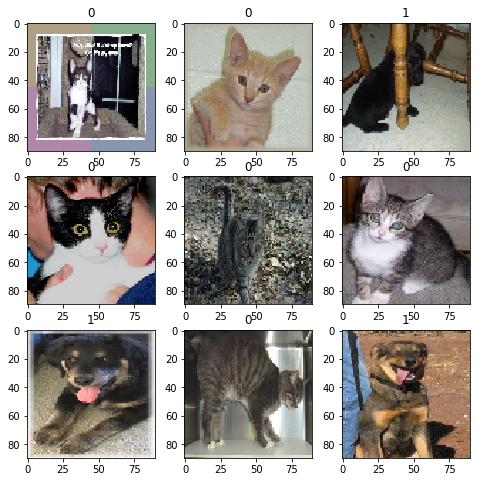

In [316]:
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.title(target_labels[i])
    plt.imshow(X[i])
plt.show()


In [317]:
# converting to categorical 
target_labels = np.array([0 if label == "cat" else 1 for label in y ])

In [329]:
# flatten  
X_flat = X.reshape( -1, X.shape[1] * X.shape[2] * X.shape[3])
X_flat = X_flat / 255.0
y = target_labels.reshape(-1)

In [330]:
print(y.shape)
print(X_flat.shape)

(3986,)
(3986, 24300)


## Let's build our logistic regression

In [331]:
len(X_flat), len(y)
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2)

In [332]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape(1, -1) 
y_test = y_test.reshape(1, -1)

In [333]:
print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train : {y_train.shape}")

X_train (24300, 3188)
X_test (24300, 798)
y_train : (1, 3188)


In [334]:
# utils
def linear(X, W, b): 
    assert W.shape[0] == X.shape[0]  
    return np.dot(W.T, X) + b


def sigmoid(Z): 
    return 1 / (1 + np.exp(-Z))


def compute_cost(A, y): 
    m = y.shape[1]
    return (- 1 / m) * np.sum(y * np.log(A) + (1 - y) * (np.log(1 - A)))

In [335]:
# propagate

def propagate(X, W, b, y): 
    
    m = y.shape[1]
    # forward pass
    
    Z = linear(X, W, b)
    A = sigmoid(Z)
    # compute cost
    cost = compute_cost(A, y)
    # compute derivatives 
    dZ = A - y 
    assert dZ.shape == (1, m)
    dW = np.dot(X, dZ.T) * (1/m)
    db = np.sum(dZ) * (1/m)
    assert dW.shape == W.shape
    
    grads = {"dW": dW, "db": db}
    return grads, cost


def fit(X, W, b, y, lr, epochs): 
    
    cost_history = []
    
    # parameters initialization
        
    for epoch in range(epochs): 

        grads, cost = propagate(X, W, b, y)
        
        # update parameters 
        dW = grads["dW"]
        db = grads["db"]
        
    
        W = W - lr * dW
        b = b - lr * db
    
        if epoch % 10 == 0: 
            print(f"Cost value at {epoch} : {cost}") 
            cost_history.append(cost)
            
    parameters = {
        "W" : W, 
        "b": b
    } 
    
    print(grads)
        
    return parameters, cost_history


def predict(X, W, b, threshold=0.5): 
    # lienar => sigmoid 
    probs = sigmoid(linear(X, W, b))
    preds = np.zeros(probs.shape)
    for i in range(probs.shape[1]): 
        preds[0, i] = 1 if (probs[0, i] > threshold) else 0
    return preds
    
def train(X_train, y_train, lr, epochs): 
    # initialize parameters 
    
    W = np.zeros((X_train.shape[0], 1)) 
    b = 0
    
    print(W.shape)
    
    parameters, cost_history = fit(X_train, W, b, y_train, lr, epochs)
    
    W, b = parameters["W"], parameters["b"]
    print("Running predictions on the trainin data : ") 
    predictions = predict(X_train, W, b)
    training_accuracy = np.mean((predictions == y_train))
    print(f"Training accuracy : {training_accuracy * 100} %")
    plt.plot(list(range(epochs // 10)), cost_history)
    plt.show()
    return
    
    

In [336]:
w, b, x, y_fake = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
predict(x, w, b)

[[0.99987661 0.99999386]]


array([[1., 1.]])

In [337]:
# w = np.random.rand(10, 1) 
# x = np.random.rand(10, 5) 
# b = np.random.rand(1, 5)
# fake_y = np.random.rand(1, 5)

# linear(x, w, b)

(24300, 1)
Cost value at 0 : 0.6931471805599451
Cost value at 10 : 0.6668677712615253
Cost value at 20 : 0.6419689232702149
Cost value at 30 : 0.6183755537992761
Cost value at 40 : 0.5960153080326426
Cost value at 50 : 0.5748187573654453
Cost value at 60 : 0.5547195308043327
Cost value at 70 : 0.5356543890090224
Cost value at 80 : 0.5175632499989824
Cost value at 90 : 0.5003891748896092
Cost value at 100 : 0.48407832124152483
Cost value at 110 : 0.468579870768769
Cost value at 120 : 0.45384593730528083
Cost value at 130 : 0.43983146010915186
Cost value at 140 : 0.4264940868143193
Cost value at 150 : 0.4137940496341608
Cost value at 160 : 0.4016940377883219
Cost value at 170 : 0.39015906856528426
Cost value at 180 : 0.3791563589472228
Cost value at 190 : 0.3686551993066756
Cost value at 200 : 0.3586268303310128
Cost value at 210 : 0.3490443240344303
Cost value at 220 : 0.3398824694716955
Cost value at 230 : 0.3311176635667133
Cost value at 240 : 0.3227278073061105
Cost value at 250 : 0.

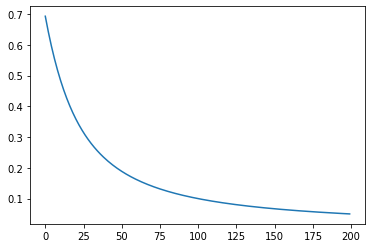

In [340]:
train(X_train, y_train, epochs=2000, lr=0.01)

In [339]:
X_train.shape

(24300, 3188)